# Updated LSTM Time Series Forecasting

In [1]:
# Let's load the required libs.
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, LeakyReLU
from keras.layers import LSTM, GRU, SimpleRNN
from keras.layers.convolutional import Conv1D, MaxPooling1D
from numpy import array
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

C:\Users\lenovo\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
import pandas as pd
export_dataframe_1 = pd.read_excel('export_dataframe.xlsx')

In [3]:
export_dataframe=export_dataframe_1
export_dataframe=export_dataframe.groupby(pd.Grouper(key='Date Opération', axis=0, freq='D')).sum()
export_dataframe.head(3)

,Dossier,Poids Taxable,Catégorie,Prévision,Réalisation,N° Achat,prev_resultat
Date Opération,,,,,,,
2017-01-02,1.862371e+10,720389.00,3367,10936.146190,10866.671905,2057463002,69.474286
2017-01-03,1.288171e+10,507856.00,1781,10097.422857,10090.737143,1259284920,6.685714
2017-01-04,2.608677e+10,1267171.63,4703,17320.157619,17306.176667,2839801236,13.980952


In [4]:
export_dataframe=export_dataframe.drop(columns=['Dossier', 'Poids Taxable','Catégorie','Prévision','N° Achat','prev_resultat'])

### LSTM Network for Regression

1262/1262 - 5s - loss: 0.0058
1262/1262 - 5s - loss: 0.0042
1262/1262 - 5s - loss: 0.0037
1262/1262 - 5s - loss: 0.0035
1262/1262 - 7s - loss: 0.0033
1262/1262 - 10s - loss: 0.0032
1262/1262 - 8s - loss: 0.0030
1262/1262 - 7s - loss: 0.0029
1262/1262 - 7s - loss: 0.0029
1262/1262 - 6s - loss: 0.0028
1262/1262 - 5s - loss: 0.0027
1262/1262 - 7s - loss: 0.0026
1262/1262 - 8s - loss: 0.0025
1262/1262 - 6s - loss: 0.0027
1262/1262 - 6s - loss: 0.0026
1262/1262 - 9s - loss: 0.0025
1262/1262 - 6s - loss: 0.0026
1262/1262 - 6s - loss: 0.0025
1262/1262 - 6s - loss: 0.0025
1262/1262 - 5s - loss: 0.0026
1262/1262 - 5s - loss: 0.0025
1262/1262 - 5s - loss: 0.0026
1262/1262 - 6s - loss: 0.0025
1262/1262 - 5s - loss: 0.0026
1262/1262 - 5s - loss: 0.0025
1262/1262 - 5s - loss: 0.0025
1262/1262 - 5s - loss: 0.0024
1262/1262 - 5s - loss: 0.0024
1262/1262 - 5s - loss: 0.0024
1262/1262 - 5s - loss: 0.0024
1262/1262 - 5s - loss: 0.0025
1262/1262 - 5s - loss: 0.0049
1262/1262 - 5s - loss: 0.0030
1262/1262

1262/1262 - 18s - loss: 3.9226e-04
1262/1262 - 18s - loss: 3.9653e-04
1262/1262 - 18s - loss: 3.6385e-04
1262/1262 - 18s - loss: 3.3002e-04
1262/1262 - 18s - loss: 3.8245e-04
1262/1262 - 19s - loss: 4.4028e-04
1262/1262 - 19s - loss: 3.0125e-04
1262/1262 - 20s - loss: 3.6213e-04
1262/1262 - 18s - loss: 5.4572e-04
1262/1262 - 18s - loss: 5.4611e-04
1262/1262 - 19s - loss: 3.0248e-04
1262/1262 - 19s - loss: 2.8183e-04
1262/1262 - 19s - loss: 3.1768e-04
1262/1262 - 19s - loss: 3.0511e-04
1262/1262 - 17s - loss: 2.6087e-04
1262/1262 - 19s - loss: 3.2487e-04
1262/1262 - 19s - loss: 4.8793e-04
1262/1262 - 19s - loss: 3.0137e-04
1262/1262 - 19s - loss: 2.8668e-04
1262/1262 - 18s - loss: 3.3486e-04
1262/1262 - 18s - loss: 3.9082e-04
1262/1262 - 18s - loss: 4.0647e-04
1262/1262 - 18s - loss: 2.8133e-04
1262/1262 - 19s - loss: 4.7595e-04
1262/1262 - 20s - loss: 3.5267e-04
1262/1262 - 19s - loss: 2.4916e-04
1262/1262 - 17s - loss: 1.9828e-04
1262/1262 - 18s - loss: 3.5991e-04
1262/1262 - 19s - lo

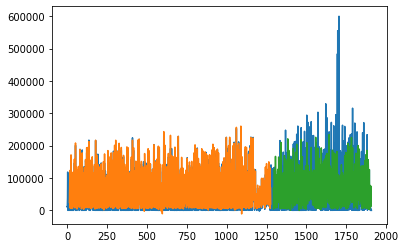

In [49]:
# Stacked LSTM for international airline passengers problem with memory
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset

dataset = export_dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 15
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(64, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(300):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### GRU for Regression

1262/1262 - 9s - loss: 0.0053
1262/1262 - 9s - loss: 0.0041
1262/1262 - 9s - loss: 0.0038
1262/1262 - 9s - loss: 0.0036
1262/1262 - 8s - loss: 0.0034
1262/1262 - 10s - loss: 0.0033
1262/1262 - 10s - loss: 0.0032
1262/1262 - 10s - loss: 0.0031
1262/1262 - 10s - loss: 0.0030
1262/1262 - 9s - loss: 0.0029
1262/1262 - 10s - loss: 0.0028
1262/1262 - 9s - loss: 0.0028
1262/1262 - 9s - loss: 0.0027
1262/1262 - 8s - loss: 0.0026
1262/1262 - 9s - loss: 0.0026
1262/1262 - 9s - loss: 0.0025
1262/1262 - 10s - loss: 0.0025
1262/1262 - 9s - loss: 0.0025
1262/1262 - 9s - loss: 0.0026
1262/1262 - 9s - loss: 0.0025
1262/1262 - 9s - loss: 0.0024
1262/1262 - 9s - loss: 0.0025
1262/1262 - 9s - loss: 0.0025
1262/1262 - 9s - loss: 0.0024
1262/1262 - 9s - loss: 0.0024
1262/1262 - 9s - loss: 0.0023
1262/1262 - 9s - loss: 0.0023
1262/1262 - 11s - loss: 0.0023
1262/1262 - 9s - loss: 0.0023
1262/1262 - 11s - loss: 0.0023
1262/1262 - 11s - loss: 0.0023
1262/1262 - 13s - loss: 0.0023
1262/1262 - 12s - loss: 0.0023

1262/1262 - 10s - loss: 2.6529e-04
1262/1262 - 10s - loss: 1.8774e-04
1262/1262 - 10s - loss: 2.6754e-04
1262/1262 - 10s - loss: 2.9338e-04
1262/1262 - 10s - loss: 2.5169e-04
1262/1262 - 10s - loss: 3.4112e-04
1262/1262 - 13s - loss: 2.5492e-04
1262/1262 - 14s - loss: 2.3787e-04
1262/1262 - 12s - loss: 2.2473e-04
1262/1262 - 11s - loss: 2.5396e-04
1262/1262 - 10s - loss: 2.6612e-04
1262/1262 - 13s - loss: 3.1842e-04
1262/1262 - 11s - loss: 2.6331e-04
1262/1262 - 15s - loss: 2.3742e-04
1262/1262 - 11s - loss: 2.6091e-04
1262/1262 - 11s - loss: 2.1795e-04
1262/1262 - 11s - loss: 2.5889e-04
1262/1262 - 11s - loss: 2.4921e-04
1262/1262 - 12s - loss: 2.9066e-04
1262/1262 - 10s - loss: 2.9622e-04
1262/1262 - 10s - loss: 2.2478e-04
1262/1262 - 11s - loss: 2.3363e-04
1262/1262 - 10s - loss: 3.9028e-04
1262/1262 - 10s - loss: 2.4306e-04
1262/1262 - 10s - loss: 1.8269e-04
1262/1262 - 10s - loss: 2.6688e-04
1262/1262 - 10s - loss: 2.5461e-04
1262/1262 - 11s - loss: 2.6447e-04
1262/1262 - 11s - lo

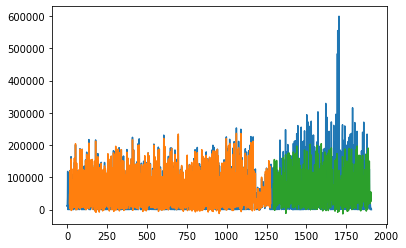

In [7]:
# Stacked GRU for international airline passengers problem with memory
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset

dataset = export_dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 15
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the GRU network
batch_size = 1
model = Sequential()
model.add(GRU(64, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(GRU(32, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(400):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

1262/1262 - 5s - loss: 0.0054
1262/1262 - 5s - loss: 0.0041
1262/1262 - 5s - loss: 0.0038
1262/1262 - 5s - loss: 0.0037
1262/1262 - 6s - loss: 0.0035
1262/1262 - 5s - loss: 0.0034
1262/1262 - 5s - loss: 0.0033
1262/1262 - 6s - loss: 0.0033
1262/1262 - 5s - loss: 0.0032
1262/1262 - 5s - loss: 0.0030
1262/1262 - 6s - loss: 0.0029
1262/1262 - 5s - loss: 0.0028
1262/1262 - 6s - loss: 0.0028
1262/1262 - 6s - loss: 0.0028
1262/1262 - 6s - loss: 0.0027
1262/1262 - 6s - loss: 0.0028
1262/1262 - 6s - loss: 0.0026
1262/1262 - 6s - loss: 0.0026
1262/1262 - 6s - loss: 0.0026
1262/1262 - 5s - loss: 0.0026
1262/1262 - 6s - loss: 0.0026
1262/1262 - 6s - loss: 0.0026
1262/1262 - 6s - loss: 0.0026
1262/1262 - 6s - loss: 0.0025
1262/1262 - 6s - loss: 0.0024
1262/1262 - 5s - loss: 0.0025
1262/1262 - 6s - loss: 0.0024
1262/1262 - 6s - loss: 0.0024
1262/1262 - 6s - loss: 0.0024
1262/1262 - 6s - loss: 0.0023
1262/1262 - 6s - loss: 0.0023
1262/1262 - 7s - loss: 0.0023
1262/1262 - 7s - loss: 0.0023
1262/1262 

1262/1262 - 7s - loss: 2.3782e-04
1262/1262 - 7s - loss: 2.6729e-04
1262/1262 - 7s - loss: 2.3862e-04
1262/1262 - 7s - loss: 2.5103e-04
1262/1262 - 8s - loss: 3.4053e-04
1262/1262 - 7s - loss: 2.8210e-04
1262/1262 - 7s - loss: 2.3284e-04
1262/1262 - 6s - loss: 2.7707e-04
1262/1262 - 7s - loss: 3.1883e-04
1262/1262 - 6s - loss: 2.4971e-04
1262/1262 - 6s - loss: 2.4722e-04
1262/1262 - 7s - loss: 3.0280e-04
1262/1262 - 6s - loss: 2.3249e-04
1262/1262 - 7s - loss: 2.3785e-04
1262/1262 - 6s - loss: 2.6208e-04
1262/1262 - 7s - loss: 3.1615e-04
1262/1262 - 7s - loss: 2.8493e-04
1262/1262 - 6s - loss: 2.2659e-04
1262/1262 - 7s - loss: 2.8568e-04
1262/1262 - 6s - loss: 2.3704e-04
1262/1262 - 7s - loss: 2.5353e-04
1262/1262 - 6s - loss: 2.3668e-04
1262/1262 - 6s - loss: 2.8045e-04
1262/1262 - 7s - loss: 2.3372e-04
1262/1262 - 7s - loss: 2.3659e-04
1262/1262 - 7s - loss: 2.4652e-04
1262/1262 - 6s - loss: 2.0576e-04
1262/1262 - 7s - loss: 2.1756e-04
1262/1262 - 6s - loss: 3.2215e-04
1262/1262 - 7s

1262/1262 - 9s - loss: 1.1459e-04
1262/1262 - 8s - loss: 1.6889e-04
1262/1262 - 8s - loss: 1.4713e-04
1262/1262 - 10s - loss: 1.2243e-04
1262/1262 - 9s - loss: 1.2315e-04
1262/1262 - 9s - loss: 1.2414e-04
Train Score: 9988.20 RMSE
Test Score: 58632.04 RMSE


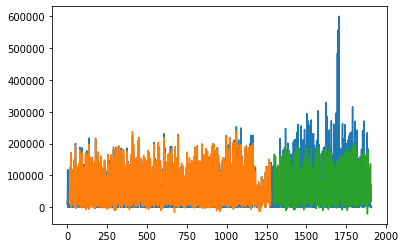

In [5]:
# Stacked GRU for international airline passengers problem with memory
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset

dataset = export_dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 15
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the GRU network
batch_size = 1
model = Sequential()
model.add(GRU(64, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(GRU(32, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(500):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
#close_data = export_dataframe.Réalisation.reshape((-1))

def predict(num_prediction, model):
    prediction_list = dataset[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list
    
def predict_dates(num_prediction):
    last_date = export_dataframe.index[-1]
    prediction_dates = pd.date_range(last_date , periods=num_prediction+1).tolist()
    return prediction_dates

num_prediction = 60
forecast = predict(num_prediction, model)
forecast_dates = predict_dates(num_prediction)
prevision=scaler.inverse_transform(forecast.reshape(-1, 1))

plt.plot(export_dataframe.index,export_dataframe.Réalisation)
plt.plot(forecast_dates,l)